# Iris dataset - Analysis

This notebook will focus on the iris data set to see how different classification methods treat the same dataset.

### a.

First, we are gonna import the needed libraries and train our logistic regression model

In [ ]:
# Import libraries required for question 2
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Split the dataset for the logistic regression
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [ ]:
# Logistic Regression model
logisticRegr = LogisticRegression(multi_class='auto', solver='liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predict the values
predictions = logisticRegr.predict(X_test)

In [ ]:
# Evaluation of the model
cm = metrics.confusion_matrix(y_test, predictions)
score = logisticRegr.score(X_test, y_test)

In [ ]:
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

Then, we can plot the confusion matrix to have a glance at how accurate is the model

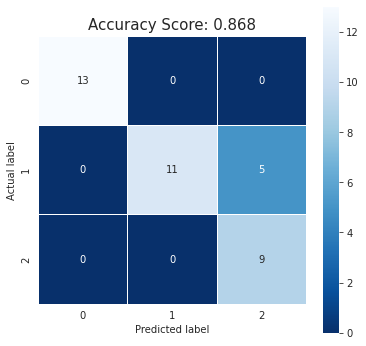

In [ ]:
# Plotting of the confusion matrix
# Creating figure
plt.figure(figsize=(6,6))

# Plotting the heatmap
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');

# Adding labels and title
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.3f' % score
plt.title(all_sample_title, size = 15);
plt.show();


It can be seen that the regression is quite accurate (86.8%).

The main errors lie in the prediction of label 1 and 2.

### b.

The k-neighbours method is used in this section to classify the data. Different values for k will be tested, and some classification map on different labels will be displayed to see how the number of neighbours and the method change the classification.

In [ ]:
# Import k-nearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

Then, we are going to plot 2 figures with 3x3 subplots in order to compare how different k and different weights impact the classification.

Defining some settings needed for the plots

In [ ]:
# Library for colors in the mesh
from matplotlib.colors import ListedColormap

# Step size in the mesh
h = 0.02

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# Choosing what to plot. 2 different weights and 3 chosen sets
weights_chosen = ['uniform', 'distance']
sets_chosen = ([0, 1], [0, 3], [2, 3])
k_chosen = [1, 50, 100]

Plotting the 2 figures

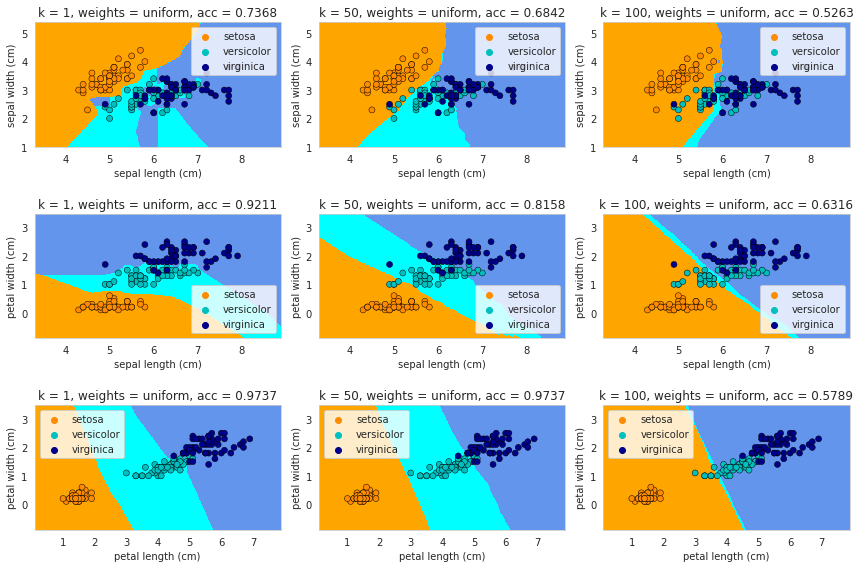

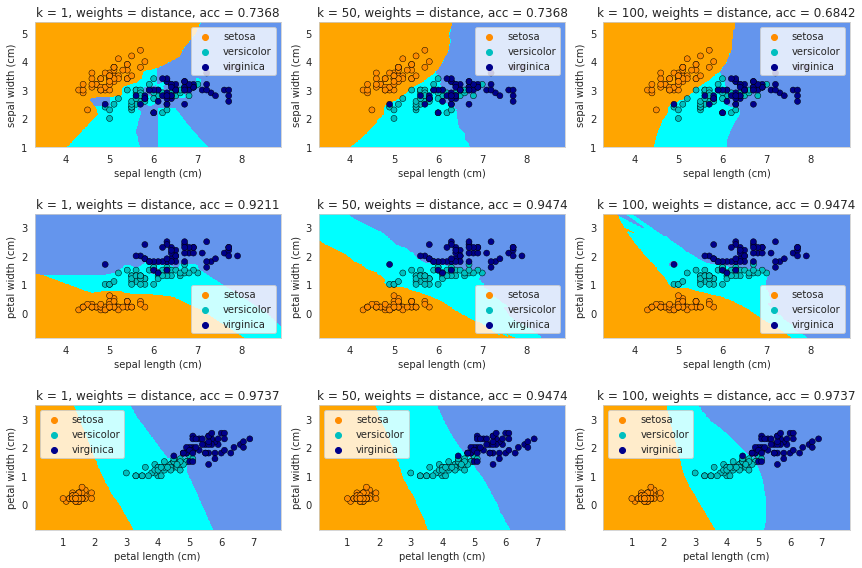

In [ ]:
# Looping through weights, sets and k
for weights in weights_chosen:
    # Create figure
    plt.figure(figsize=(12,8))

    # Counter utilized to plot on the subplots 
    counter = 0

    for sets in sets_chosen:
        for n_neighbors in k_chosen:
            # Slicing data to the chosen one, so to have a binary scatterplot
            X = iris.data[:, sets]
            y = iris.target

            # Train and test data for the model
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

            # To move to the next subplot
            counter = counter + 1
            
            # We create an instance of Neighbours Classifier and fit the data
            clf = KNeighborsClassifier(n_neighbors, weights=weights)
            clf.fit(X_train, y_train)

            # Calculating the accuracy
            y_predict = clf.predict(X_test)
            accuracy = metrics.accuracy_score(y_test, y_predict)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            plt.subplot(3,3, counter)
            plt.contourf(
                xx, 
                yy, 
                Z, 
                cmap=cmap_light)

            # Plot also the training points
            sns.scatterplot(
                x=X[:, 0],
                y=X[:, 1],
                hue=iris.target_names[y],
                palette=cmap_bold,
                alpha=1.0,
                edgecolor="black",
            )

            # Setting labels and titles
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            plt.title(
                "k = %i, weights = %s, acc = %0.4f" % (n_neighbors, weights, accuracy)
            )
            plt.xlabel(iris.feature_names[sets[0]])
            plt.ylabel(iris.feature_names[sets[1]])
    # Increasing the distance between plots to increase readibility
    plt.tight_layout(h_pad=2)
    plt.show()

As expected, it can be seen that a higher number of **k** underfit the data while a lower number overfit it.
More precisely, it can be seen that overall the weights *distance*, method where the closer neighbours of a query point will have a greater influence than neighbours which are further away, have a higher accuracy. This might be because some labels have less samples than others and are more spread out than other ones, such as the *versicolor* label.






As expected, it can be seen that a higher number of k underfit the data while a lower number overfit it.

### c.

The accuracy of the different models can be compared to see how the different weigthing methods and number of neighbours influence the result.

Confusion matrix will also be displayed on these methods and regression one to see which one is the most accurate.

From this study, it is clear that the *distance* method is more robust and precise than the *uniform* one in this specific case. This might mean, as stated before, that some labels are occuring less often and are more spread out.
Moreover, with an increasing number of neighbour, is the accuracy of the uniform model decreasing fast.

In [ ]:
# Plots of the confusion maps

# Slicing
X = iris.data
y = iris.target
class_names = iris.target_names

# Train and test data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Choosing what to plot. 2 different weights and 3 chosen sets
weights_chosen = ['uniform', 'distance']
sets_chosen = ([0, 1], [0, 3], [2, 3])
k_chosen = [1, 50, 100]

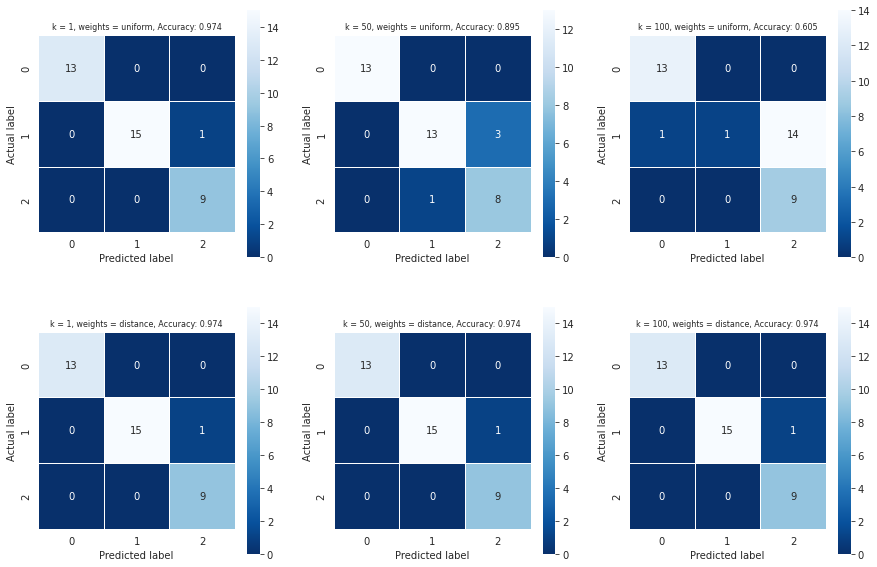

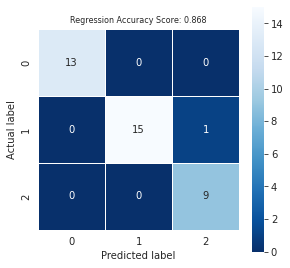

In [ ]:
# Create figure
plt.figure(figsize=(15,10))

# Counter utilized to plot on the six subplots 
counter = 0

# Looping though both uniform and distance and different k
for weights in weights_chosen:
    for n_neighbors in k_chosen:
        # To move to the next subplot
        counter = counter + 1    
        
        # We create an instance of Neighbours Classifier and fit the data
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Calculating the accuracy
        y_predict = clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_predict)
        cm = metrics.confusion_matrix(y_test, y_predict)

        # Plotting the subplots
        plt.subplot(2,3,counter)
        sns.heatmap(cm, 
            annot=True, 
            fmt="d", 
            linewidths=.5, 
            square = True, 
            cmap = 'Blues_r');

        # Adding labels and titles
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = 'k = %i, weights = %s, Accuracy: %.3f' %(n_neighbors, weights, accuracy)
        plt.title(all_sample_title, size = 8);

# Plot the last confusion matrix for the regression model
# Setting figure size
plt.figure(figsize=(4.5,4.5))

# Plotting the confusion matrix
sns.heatmap(cm, 
    annot=True, 
    fmt="d", 
    linewidths=.5, 
    square = True, 
    cmap = 'Blues_r');

# Adding labels and titles
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Regression Accuracy Score: %.3f' % score
plt.title(all_sample_title, size = 8);
plt.show()

In [ ]:
#Evaluating the accuracy of the different methods 
X = iris.data
y = iris.target

# Train and test data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Creating a new dataframe to plot the accuracy vs k
df = pd.DataFrame()
df = pd.DataFrame(columns = ["k", "Weights", "Accuracy"])

# Looping to calculate the accuracy of each k for the whole sets
for n_neighbors in range(1, len(X_train), 1):
    for weights in ["uniform", "distance"]:
        # Training on all the sets for different k
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Calculating the accuracy
        y_predict = clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_predict)
        df.loc[len(df.index)] = [n_neighbors, weights, accuracy]

<AxesSubplot:xlabel='k', ylabel='Accuracy'>

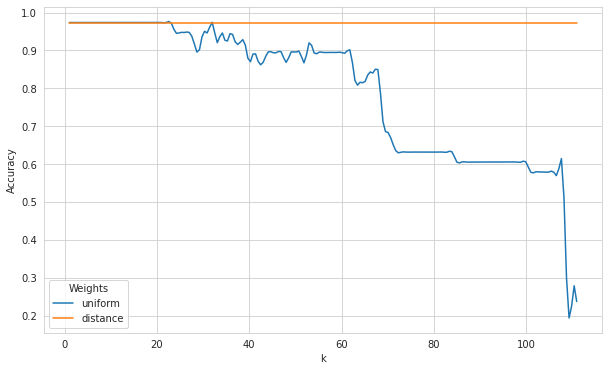

In [ ]:
# Using splines to better visualize the lineplot
from scipy.interpolate import make_interp_spline, BSpline

#Plot of the different accuracy for the k-neighbours method
x_spline = df[df['Weights']=='uniform']['k']
y_spline = df[df['Weights']=='uniform']['Accuracy']

#define spline
xnew = np.linspace(df['k'].min(), df['k'].max(), 200) 
spl = make_interp_spline(x_spline, y_spline, k=3)
y_smooth = spl(xnew)

# Creating a new dataframe to plot the lineplot
df_new = pd.DataFrame()
df_new['k'] = xnew
df_new['Accuracy'] = y_smooth
df_new['Weights'] = 'uniform'
df_new = df_new.append(df[df['Weights']=='distance'])
df_new.reset_index(drop=True, inplace=True)

# Plotting a line plot of accuracy vs k
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_new, x=df_new['k'], y=df_new['Accuracy'], hue=df_new['Weights'])

## 3.

Different sets are required to create an accurate and robust model.

In fact, the training set is used to train your model by feeding the data into an algorithm that will create the model.

Then, the validation set is used to evaluate the score, ie the performance of your model, in order to try different hyperparameters, such as the number of k-neighbours in our case, to fine tune the model and improve it. This fine tuning can not be find analytically since it is provided by the developer and requires more a hit-&amp;-try method that rely on the developper expertise.

Finally, the test set is a set used after the full optimisation of your model to score in an unbiased way your model. The test set is usually analysed and treated carefully in order to have a representative set, that covers the whole span of potential situations the model might experience. For instance, only having a validation test might overfit the model to this specific set, making the model non-robust.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ce62ffe-d3df-42e3-9fce-7399db6ae8c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>